<a href="https://colab.research.google.com/github/AlexTako/fake_news/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1. Обнаружение фальшивых новостей

Фальшивые новости — это ложная информация, распространяемая через социальные сети и другие сетевые СМИ для достижения политических или идеологических целей.

Твоя  задача -  используя библиотеку sklearn построить модель классического машинного обучения, которая может с высокой точностью более 90% определять, является ли новость реальной (REAL） или фальшивой（FAKE).

In [ ]:
#устанавливаем пакеты
!pip install pandas
!pip install scikit-learn

In [ ]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split #встроенная функция sklearn, разделяет данные на тестовые и обучающие случайным образом
from sklearn.linear_model import PassiveAggressiveClassifier
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [ ]:
#загружаем датасет
data = pd.read_csv('fake_news.csv')

In [ ]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
#преобразуем реальность новостей в числа
encoding = LabelEncoder()
is_real = encoding.fit_transform(data['label'])

is_real

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
#используя TfidVectorizer преобразуем текст новостей в нужный вид
vectorized = TfidfVectorizer()
news = vectorized.fit_transform(data['text'])

print(news.shape)

(6335, 67659)


In [ ]:
#производим разделение на обучающую и тестовую выборку
news_train, news_test, is_real_train, is_real_test = train_test_split(news, is_real)

In [ ]:
#строим модель обучения
pas_agr_cl = PassiveAggressiveClassifier(random_state = 0)

In [ ]:
#обучение модели
pas_agr_cl.fit(news_train, is_real_train) #1 аргумент данные, 2 - значения которые должны получить

PassiveAggressiveClassifier(random_state=0)

In [ ]:
#делаем предсказание
news_is_real = pas_agr_cl.predict(news_test)
print(news_is_real)

[1 1 0 ... 1 0 1]


In [ ]:
#оцениваем точность
pas_agr_cl.score(news_test, is_real_test)

0.9330808080808081

Confusion matrix, without normalization
[[741  51]
 [ 55 737]]


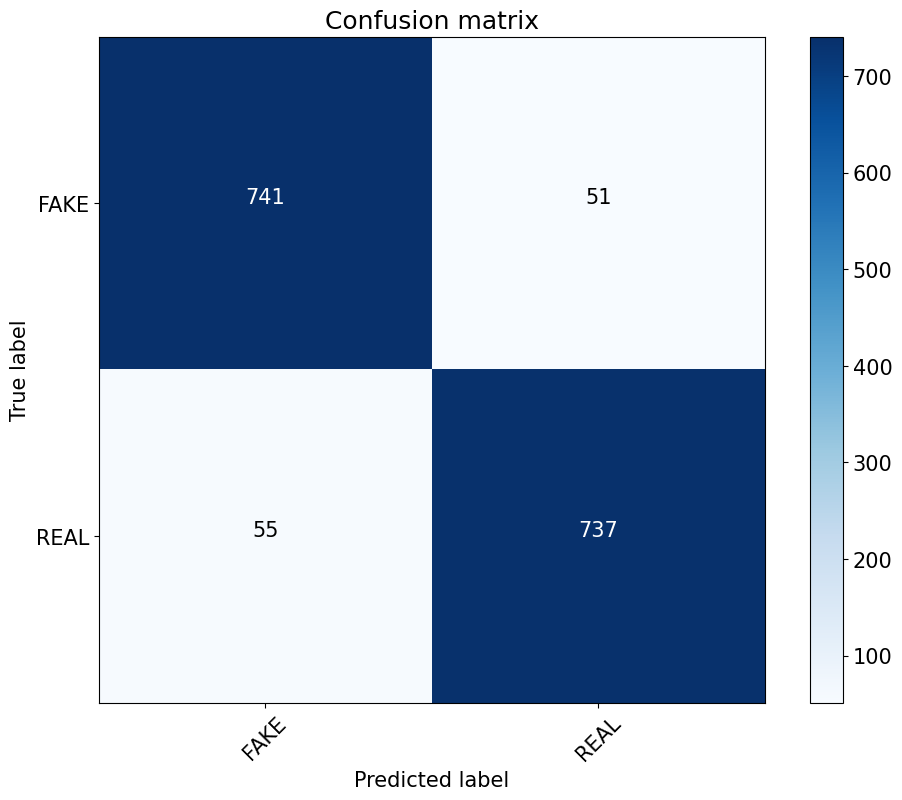

In [ ]:
#построим матрицу точности
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(is_real_test, pas_agr_cl.predict(news_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['FAKE', 'REAL'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()